In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score,
    precision_recall_fscore_support, roc_auc_score, roc_curve,
    precision_recall_curve, ConfusionMatrixDisplay, precision_score,
    recall_score, f1_score
)

In [2]:
toyo = pd.read_csv("ToyotaCorolla.csv",encoding = 'latin2')
toyo.head(11)

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
5,6,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,12950,32,1,2002,61000,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
6,7,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,16900,27,6,2002,94612,Diesel,90,1,...,1,1,1,0,0,1,1,0,0,0
7,8,TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors,18600,30,3,2002,75889,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
8,9,TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors,21500,27,6,2002,19700,Petrol,192,0,...,1,1,1,1,0,0,0,1,1,0
9,10,TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors,12950,23,10,2002,71138,Diesel,69,0,...,0,0,1,0,0,0,1,0,0,0


In [3]:
toyo1 = toyo[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
toyo1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [4]:
toyo1 = toyo1.rename({"Age_08_04":"Age","cc":"CC","Quarterly_Tax":"QT"}, axis = 1)
toyo1


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
toyo1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [6]:
toyo1.corr()

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<Axes: >

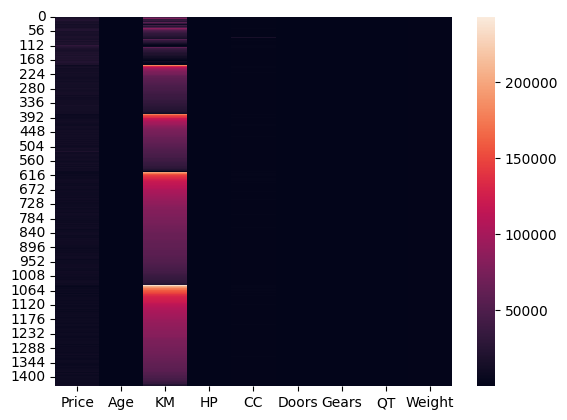

In [7]:
sns.heatmap(toyo1)

In [8]:
toyo1.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [9]:
toyo1.isnull().sum()

Price     0
Age       0
KM        0
HP        0
CC        0
Doors     0
Gears     0
QT        0
Weight    0
dtype: int64

In [10]:
toyo1[toyo1.duplicated()]


,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [11]:
toyo2 = toyo1.drop_duplicates().reset_index(drop=True)
toyo2

,Price,Age,KM,HP,CC,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [12]:
from sklearn.model_selection import train_test_split

# Make sure your column names are correct (no extra spaces or tabs)
X = toyo1[["Age","QT","Weight","KM"]]
y = toyo1['Price']


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# model = LinearRegression()
# model.fit(X_train,y_train)
# y_pred = model.predict(X_test)
# print("RMSE:",mean_squared_error(y_test,y_pred))


RMSE: 2274854.3283718545


In [15]:
error = y_test - y_pred

In [16]:
new = pd.DataFrame({"y_test": y_test, "y_pred":y_pred, "error": error})
new.head()

,y_test,y_pred,error
594,10800,11518.655423,-718.655423
754,9950,8649.407891,1300.592109
630,7500,10001.143610,-2501.143610
1259,9250,8732.689356,517.310644
903,9750,10184.861419,-434.861419


In [23]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,y_pred))

Accuracy: 0.08680555555555555
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\TEJAS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("RMSE:",mean_squared_error(y_test,y_pred))


RMSE: 1831081.1909722222


In [25]:
error = y_test - y_pred


In [31]:
new = pd.DataFrame({"y_test": y_test, "y_pred":y_pred, "error": error})
new.head()



,y_test,y_pred,error
594,10800,9950,850
754,9950,9950,0
630,7500,8950,-1450
1259,9250,7750,1500
903,9750,9950,-200


In [30]:
print(accuracy_score(y_test,y_pred))

0.0763888888888889
